1000it [00:24, 40.40it/s]


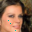

In [18]:
from tqdm import tqdm
import torch
from torchvision import transforms
from src.unet import Unet
from src.noise_schedule import linear_noise_schedule
from src.gaussian_diffusion import GaussianDiffusion


inverse_transform = transforms.Compose([
    transforms.Lambda(lambda x: (x + 1) / 2),
    transforms.ToPILImage()
])
device = torch.device('cuda:0')

model = Unet(
    dim=32,
    dim_mults=(1, 2, 4, 8),
    channels=3,
).to(device)

beta = linear_noise_schedule()
gd = GaussianDiffusion(beta).to(device)
model.load_state_dict(torch.load('ckpts/unet_celeba.pth'))
model.eval()

samples = gd.sample(model, (16, 3, 32, 32))
inverse_transform(samples[0])